Предобработка данных — это действия с данными перед передачей их модели, могут включать в себя центрирование, нормализацию, сдвиг, вращение, обрезку. Часто требуется при необходимости очистить данные от ненужного или дополнить какой-то информацией.


Объект со свойствами, например, пол, возраст, воинское звание, средний чек в супермаркете за последний месяц, дескрипторы лица. Признаки могут быть категориальными (мужской и женский пол), числовыми (возраст, сумма в чеке) и ординальными — смешанными (воинское звание).

2. Временные ряды
Значения меняются во времени, например, рост курса рубля к доллару, голос человека на записи, ЭКГ.
3. Изображения
Примеры: видеонаблюдение, компьютерная томография, снимок рентген, спутниковые снимки.
4. Тексты
Слова и фразы, к которым можно применять разные задачи: оценивать тональность, искать факты, делать машинный перевод, производить суммаризацию статей (краткое изложение текста с помощью МО).
5. Другие типы
Граф подписок в Instagram, лог работы сервера, показатель растительности поля (NDVI), истории болезни, названия товаров в чеке.

In [80]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

Неполные данные: заказчик выслал не все данные, в них есть пропуски, нет данных за определённый период, есть данные только для части задач. Например, есть рейсы только одной авиакомпании, есть суммы покупок с января по март и с июня по декабрь.

Грязные данные:
— данные в плохом или разном формате;
— в данных есть мусор, например, смешиваются русские и английские буквы, данные в виде шифра,
— разные меры данных, например, часть в метрах, часть в футах; 
— данные старые, значения признака перемешиваются.

Плохая разметка: в данных есть ошибки, разная оценка данных из-за человеческого фактора, разметка не соответствует реальности, размеченных данных очень много — должна быть «золотая середина». Чем лучше хотите получить разметку, тем больше времени придётся потратить.

Данные с утечкой: в данных нужно избегать признаков, от которых явно зависит целевая переменная. Такая ситуация приводит к тому, что во время обучения модель всё предсказывает, но в боевых условиях бесполезна.

Пропуски — отсутствие значений в данных. Обычно это случается из-за ошибок человека: забыли, какие данные не внесли, не всё перенесли из другого документа, неверно заполнили документ, случайно удалили часть данных. Например, при опросе респонденты отвечали только на часть вопросов, не указывая какие-то данные.

Что делать с пропусками?

Удалить пропуски: удалить строки с пропусками, если таких строк немного, или столбцы (признаки) в данных, если их много, и это не повлияет на результат в целом.

Заменить пропуски: заменить на среднее значение (медианой) или на самый часто попадающийся вариант. Например, опрос респондентов проходил в Москве, вероятнее, большинство — жители города, а не туристы. Значит, в графе город можно поставить «Москва». Или же по другим данным в документе можно восстановить пол людей, которые его не указали.

Записать новое значение: например, вместо пропуска в столбце «Пол» указать «не определён».

Заменить алгоритмами МО: признак можно считать целевой переменной и обучать модель, чтобы предсказать пропущенные значения.

In [7]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [8]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


In [9]:
test_data.dropna(axis=0) # При axis=0 удаляются строки, при 1 — столбцы, по умолчанию значение равно 0

,one,two,three
2,0,1.0,2.0


In [10]:
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


Какими статистиками можно заменить пропуски:

среднее значение np.mean();
максимальное значение np.max();
минимальное значение np.min();
медиана np.median().

In [22]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
mode_state = vis_data['state'].mode()[0]
result = vis_data['state'].fillna(mode_state)

In [74]:
data = pd.read_csv('data_flats.csv',sep=";")
data = data.dropna(axis=0)
data.shape

(13652, 56)

#### Нормализация признаков

Посмотрим, как с помощью методов нормализации, можно изменять масштаб признаков. В большинстве случаев хуже от этого метода не бывает, поэтому рекомендуется применять его всегда.

Один из стандартных способов нормализации — minmax нормализация, которая приводит независимо каждый признак к значению между 0 и 1. Для каждого признака мы находим минимальное и максимальное значение, из всех значений вычитаем минимальное значение и делим это на разницу между максимальным и минимальным значениями.

In [25]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 1.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 0.        , 0.        ]])

Ещё один вид нормализации — std нормализация. Мы находим среднее значение для признака, затем стандартное отклонение, из каждого значения в текущем признаке вычитаем среднее значение для всего признака и делим на стандартное отклонение.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124,  1.        ,         nan],
       [ 1.33630621,         nan,  1.        ],
       [-1.06904497, -1.        , -1.        ]])

MinMaxScaler и StandardScaler сохраняют параметры, с которыми проводят нормализацию. Поэтому после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными.

In [27]:
test_data.drop('one', axis=1)

,two,three
0,2.0,NaN
1,NaN,4.0
2,1.0,2.0


In [33]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
balance_data = np.array(vis_data['balance_due']).reshape(-1, 1)
scaler = StandardScaler()
balance_data_norm = scaler.fit_transform(balance_data)

In [35]:
balance_data_norm.min()

-13.147334652567258

Один из способов визуализации — гистограмма — вид диаграммы, показывающий данные в форме столбцов. Демонстрирует распределение данных по выборке внутри столбца и значений в признаке. Позволяет увидеть проблемы или некорректные значения в данных, преобразовать их в наглядную форму и распределить, чтобы облегчить работу.

Correlation plot — корреляционный график. Признаки в данных могут иметь сильную корреляцию, то есть линейную зависимость. Если зависимость большая, признаки несут избыточную информацию, поэтому скореллированные признаки лучше удалять.

Кроме визуализации распределения числовых признаков с помощью гистограммы, возможно еще представление с использованием ящика с усами (или боксплота). Их преимущество состоит в том, что с помощью одной диаграммы можно представить основные описательные статистики: медиану, а также верхний (третий) и нижний( первый) квартили. Напомним, что данные показатели являются робастными (устойчивыми к выбросам), что позволяет представлять с помощью этой диаграммы даже признаки с наличием выбросов. Причем, выбросы будут обозначены с помощью кружочков. То есть, по сути, с помощью построения боксплота можно даже выявить наличие выбросов в ваших данных.

Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные. Один из способов сделать данные «нормальными» — взять логарифм. При этом не должно быть значений равных 0, иначе метод np.log выдаст бесконечность.

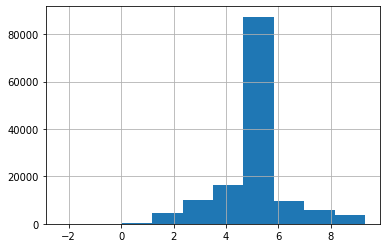

In [36]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Если значения всё-таки начинаются с 0, то перед тем, как взять логарифм, можно прибавить к данным 1.

Другой способ — взять квадратный корень от данных:

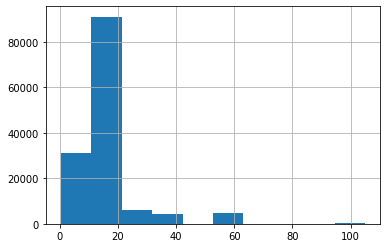

In [37]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Между некоторыми признаками есть некоторая линейная зависимость, то есть они сильно скоррелированы друг с другом. Если зависимость большая, то следует убрать часть скоррелированных признаков, так как они несут избыточную информацию. Для определения зависимости можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.

In [38]:
import seaborn as sns

corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
admin_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


In [39]:
balance_due_sqrt = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
balance_due_sqrt.mean() - balance_due_sqrt.median()

-0.4525960609393067

In [42]:
data = pd.read_csv('data_flats.csv',sep=";")
data_filt = data[data['sub_area'].isin(['Basmannoe','Lefortovo','Perovo','Bogorodskoe'])]

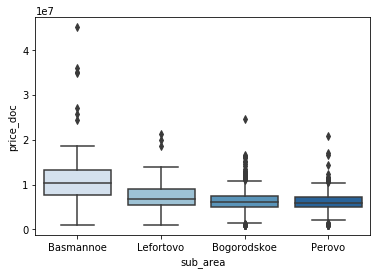

In [46]:
import seaborn as sns
sns.boxplot(x=data_filt['sub_area'], y=data_filt["price_doc"], palette="Blues")


Feature Engineering — способ создания признаков, техника решения задач МО, которая увеличивает качество разрабатываемых алгоритмов. Превращает специфичные данные в понятные для модели векторы.

In [47]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])

In [59]:
print(poly_features.mean(axis=0))

[ 1.00000000e+00  2.22449058e+02  1.25166796e-01  4.17195810e+05
 -9.85531709e+00  1.17817392e+01  2.04200098e+09  1.17924384e+05
 -1.49564074e+02  3.07417605e+03]


In [63]:
vis_data['on_wkd'] = pd.to_datetime(vis_data.ticket_issued_date).dt.weekday > 4
vis_data

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,on_wkd
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,False
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,48208,NaN,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,False
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,23658.0,P.O. BOX,DETROIT,MI,48223,NaN,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,False
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,5.0,ST. CLAIR,DETROIT,MI,48214,NaN,USA,2004-04-26 13:30:00,NaN,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,False
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,7449.0,CHURCHILL,DETROIT,MI,48206,NaN,USA,2004-04-26 13:00:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,1715.0,MEYERS,DETROIT,MI,48235,NaN,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,False
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,1715.0,MEYERS,DETROIT,MI,48235,NaN,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,False
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,1715.0,MEYERS,DETROIT,MI,48235,NaN,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,Fail to comply with an Emergency or imminent d...,Not responsible by City Dismissal,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,False
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,1715.0,MEYERS,DETROIT,MI,4823

In [64]:
vis_data['on_wkd'].value_counts()

False    248686
True       1620
Name: on_wkd, dtype: int64

In [65]:
data

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,NaN,1,0,10,3,0,9,6,1.384021,0.659002,8.158093,0.679841,0.132645,0.349899,1.972527,0.139814,0.702853,3.147161,37.765933,0.093258,1.119101,3.762408,8.361875,10.543724,11.118577,12.599292,8.820934,0.812253,0.063432,2.190217,0.720736,6.769773,3.470281,3.817988,2.236806,1.442576,0.325885,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,7400000
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,1046.0,3,2,29,16,10,23,141,1.060577,0.781217,9.374609,0.781217,0.276256,0.362681,1.036452,0.271861,0.473020,0.902227,10.826720,0.090712,1.088544,13.100989,1.238732,1.203215,1.874868,3.269284,12.102735,1.825643,0.398831,1.133905,2.896280,2.965732,1.912873,0.951754,0.672662,0.796851,0.540003,0.069986,0.086552,0.362681,0.850385,0.

In [82]:
ecology_dict = {'excellent': 4, 'good':3, 'satisfactory':2, 'poor':1, 'no data':0 }
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [83]:
data.ecology.unique()

array([3, 4, 1, 2, 0])

In [84]:
data.ecology.mean()

1.7282483836030063

In [86]:
pd.get_dummies(data = data, columns = ['sub_area'])

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc,sub_area_Ajeroport,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,sub_area_Birjulevo Vostochnoe,sub_area_Birjulevo Zapadnoe,sub_area_Bogorodskoe,sub_area_Brateevo,sub_area_Butyrskoe,sub_area_Caricyno,sub_area_Cheremushki,sub_area_Chertanovo Central'noe,sub_area_Chertanovo Juzhnoe,sub_area_Chertanovo Severnoe,sub_area_Danilovskoe,sub_area_Dmitrovskoe,sub_area_Donskoe,sub_area_Dorogomilovo,sub_area_Filevskij Park,sub_area_Fili Davydkovo,sub_area_Gagarinskoe,sub_area_Gol'janovo,sub_area_Golovinskoe,sub_area_Hamovniki,sub_area_Horoshevo-Mnevniki,sub_area_Horoshevskoe,sub_area_Hovrino,sub_area_Ivanovskoe,sub_area_Izmajlovo,sub_area_Jakimanka,sub_area_Jaroslavskoe,sub_area_Jasenevo,sub_area_Juzhnoe Butovo,sub_area_Juzhnoe Medvedkovo,sub_area_Juzhnoe Tushino,sub_area_Juzhnoportovoe,sub_area_Kapotnja,sub_area_Kon'kovo,sub_area_Koptevo,sub_area_Kosino-Uhtomskoe,sub_area_Kotlovka,sub_area_Krasnosel'skoe,sub_area_Krjukovo,sub_area_Krylatskoe,sub_area_Kuncevo,sub_area_Kurkino,sub_area_Kuz'minki,sub_area_Lefortovo,sub_area_Levoberezhnoe,sub_area_Lianozovo,sub_area_Ljublino,sub_area_Lomonosovskoe,sub_area_Losinoostrovskoe,sub_area_Mar'ina Roshha,sub_area_Mar'ino,sub_area_Marfino,sub_area_Matushkino,sub_area_Meshhanskoe,sub_area_Metrogorodok,sub_area_Mitino,sub_area_Molzhaninovskoe,sub_area_Moskvorech'e-Saburovo,sub_area_Mozhajskoe,sub_area_Nagatino-Sadovniki,sub_area_Nagatinskij Zaton,sub_area_Nagornoe,sub_area_Nekrasovka,sub_area_Nizhegorodskoe,sub_area_Novo-Peredelkino,sub_area_Novogireevo,sub_area_Novokosino,sub_area_Obruchevskoe,sub_area_Ochakovo-Matveevskoe,sub_area_Orehovo-Borisovo Juzhnoe,sub_area_Orehovo-Borisovo Severnoe,sub_area_Ostankinskoe,sub_area_Otradnoe,sub_area_Pechatniki,sub_area_Perovo,sub_area_Pokrovskoe Streshnevo,sub_area_Poselenie Desjonovskoe,sub_area_Poselenie Filimonkovskoe,sub_area_Poselenie Kievskij,sub_area_Poselenie Klenovskoe,sub_area_Poselenie Kokoshkino,sub_area_Poselenie Krasnopahorskoe,sub_area_Poselenie Marushkinskoe,sub_area_Poselenie Mihajlovo-Jarcevskoe,sub_area_Poselenie Moskovskij,sub_area_Poselenie Mosrentgen,sub_area_Poselenie Novofedorovskoe,sub_area_Poselenie Pervomajskoe,sub_area_Poselenie Rjazanovskoe,sub_area_Poselenie Rogovskoe,sub_area_Poselenie Shhapovskoe,sub_area_Poselenie Shherbinka,sub_area_Poselenie Sosenskoe,sub_area_Poselenie Vnukovskoe,sub_area_Poselenie Voronovskoe,sub_area_Poselenie Voskresenskoe,sub_area_Preobrazhenskoe,sub_area_Presnenskoe,sub_area_Prospekt Vernadskogo,sub_area_Ramenki,sub_area_Rjazanskij,sub_area_Rostokino,sub_area_Savelki,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Silino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Staroe Krjukovo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troickij ok

Выброс — результат измерения, который выделяется из общей выборки. Выбросы появляются из-за ошибок в данных и сильно выделяющихся среди остальных значений. Их нужно искать и удалять, иначе данные будут подстраиваться под них и давать неверный результат.

Как искать выбросы:

Поиск и удаление по порогу
Способ нахождения выбросов, основанный на здравом смысле и методе пристального взгляда. Посмотреть данные и поискать невозможные и нелогичные значения, например, в столбце «высота здания» стоит 30 км.

Поиск с помощью статистики
Поиск с помощью здравого смысла трудно автоматизировать, поэтому эффективнее статистические методы. Например, поиск по отклонению или по распределению IQR (interquartile range, межквартильное расстояние).

Поиск с помощью DBSCAN
Поиск с помощью методов кластеризации, один из таких методов — DBSCAN, который может автоматически находить шум в данных.

Разные способы поиска выбросов могут давать разные результаты. Не всегда выделяющееся значение будет являться выбросом, возможно, у нас пока просто не хватает данных.

In [94]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, asin, sqrt
%matplotlib inline

vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

In [95]:
np.sum(vis_data.fine_amount < 0)

0

In [96]:
max_fine = np.max(vis_data.fine_amount)
max_fine

max_fine_count = np.sum(vis_data.fine_amount == max_fine)
max_fine_count, max_fine_count/vis_data.shape[0]

(357, 0.0014262542647799094)

поиск по отклонению, где ищутся значения, на которое отклоняется данная точка от среднего. Это делается с помощью z-score — расстояния от среднего значения точек

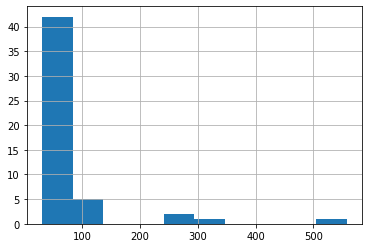

In [97]:
vis_data.distance[vis_data.distance > 30].hist()

In [99]:
import warnings
def outliers_z_score(ys, threshold=3):
    mean_y = np.mean(ys)#среднее
    std_y = np.std(ys)# станд отклонение
    z_scores = [(y - mean_y) / std_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    o = outliers_z_score(vis_data.distance)

len(o)

55

IQR (interquartile range, межквартильное расстояние) — использование перцентили (в нашем случае квартили) для определения, где находятся выбросы. Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки.

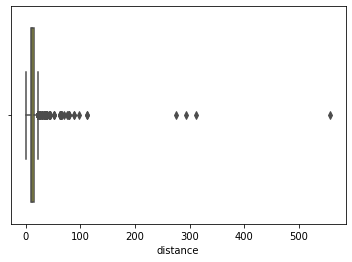

In [101]:
sns.boxplot(vis_data.distance, color='yellow');

In [100]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

In [107]:
o = outliers_iqr(vis_data.distance.dropna())
len(o)

134

поиск по распределению — построить нормальное распределение поверх данных, посчитать вероятность нахождения каждого значения в данном распределении. Самые невероятные значения будем считать выбросами.

In [104]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

In [105]:
mu, sigma = estimate_gaussian(vis_data.distance.dropna())
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, vis_data.distance.dropna())

Мы построили нормальное распределение на предоставленных данных и посчитали вероятность появления данной точки при данном распределении для каждого значения. Теперь выберем разумное значение вероятности, ниже которой будем считать точку выбросом. Например, 0.014

In [106]:
o_1 = np.where(probabilities < 0.014)[0]
len(o_1)

58

Алгоритм кластеризации DBSCAN определяет группы (кластеры) объектов. Его особенностью является то, что кроме самих кластеров он хорошо находит отдельно стоящие элементы, "шум". Применим его для нахождения выбросов.

In [108]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [109]:
normalized_dist = np.random.choice(vis_data.distance.dropna().values, 50000).reshape(-1, 1)

In [110]:
db = DBSCAN(eps=0.5, min_samples=10).fit(normalized_dist)

In [111]:
len(np.where(db.labels_ == -1)[0])

23

Несмотря на то, что выбросы "портят" общую картину и заставляют статистики в данных (например, среднее) выглядеть неправильно, иногда они очень важны:

Если мы занимаемся поиском аномалий (Anomaly Detection), выбросы являются нашими зависимыми переменными, которые необходимо найти, а не значениями, которые нужно выбросить. Поиск аномалий выходит за рамки курса
Как можно было понять из методов выше, нет однозначного способа понять, что перед нами выброс. Разные методы возвращают разные точки в качестве выбросов, и эти точки пересекаются лишь частично. Кроме этого, разные параметры дают разные результаты и эти параметры необходимо крутить руками. Из-за этого найденные выбросы является крайне субъективным результатом

In [112]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)

In [121]:
def outliers_iqr_val(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return ys[(ys > upper_bound) | (ys < lower_bound)].values

In [123]:
outliers_iqr_val(vis_data.balance_due.dropna())

array([ 855.,  855.,  855., ..., 1130., 1130., 1130.])

In [124]:
np.max(outliers_iqr_val(vis_data.balance_due.dropna())) - np.min(outliers_iqr_val(vis_data.balance_due.dropna()))

18780.0